In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os






Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
conda install -c anaconda tensorflow-gpu

Solving environment: ...working... failed with current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow-gpu

Current channels:

  - https://conda.anaconda.org/anaconda/win-32
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/win-32
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-32
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-32
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
df = pd.read_csv('News3.csv', encoding = 'unicode_escape')
df.head()



FileNotFoundError: [Errno 2] File b'News3.csv' does not exist: b'News3.csv'

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('a' , 'am' , 'an' , 'and' , 'any' , 'are' , 'as' , 'at' , 'be' , 'both' , 'but' , 'by' , 'can' , 'did' , 'do' , 'does' , 'doing' , 'don' , 'down' , 'each' , 'few' , 'for' , 'from' , 'further' , 'had' , 'has' , 'have' , 'having' , 'he' , 'her' , 'here' , 'hers' , 'herself' , 'him' , 'himself' , 'his' , 'how' , 'i' , 'if' , 'in' , 'into' , 'is' , 'it' , 'its' , 'itself' , 'just' , 'me' , 'more' , 'most' , 'my' , 'myself' , 'no' , 'nor' , 'not' , 'now' , 'of' , 'off' , 'on' , 'once' , 'only' , 'or' , 'other' , 'our' , 'ours' , 'ourselves' , 'out' , 'over' , 'own' , 's' , 'same' , 'she' , 'should' , 'so' , 'some' , 'such' , 't' , 'than' , 'that' , 'the' , 'their' , 'theirs' , 'them' , 'then' , 'there' , 'these' , 'they' , 'this' , 'those' , 'through' , 'to' , 'too' , 'under' , 'until' , 'up' , 'very' , 'was' , 'we' , 'were' , 'what' , 'when' , 'where' , 'which' , 'while' , 'who' , 'whom' , 'why' , 'will' , 'yo'))

word_tokens = word_tokenize(df.Body)
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = [] 
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
print(word_tokens) 
print(filtered_sentence) 


In [3]:
cates = df.groupby('MegaCategory')
print("total categories:", cates.ngroups)
print(cates.size())

NameError: name 'df' is not defined

In [1]:
from nltk.tokenize import word_tokenize 

def remove_stop_words(data):
    stop_words = set(stopwords.words('english'))
    stop_words.union(['january','february','march','april','may','june','july','august','september','october','november','december'])
    stop_words.union(['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec'])
    stop_words.union(['monday', 'tuesday', 'wednesday', 'thursday','friday','saturday','sunday'])
    stop_words.union(['am', 'pm'])
    word_tokens = word_tokenize(data) 
    filtered_sentence = []
    
    for w in word_tokens: 
        if w.lower() not in stop_words: 
            filtered_sentence.append(w) 
    
    return " ".join(filtered_sentence)

In [4]:
# using headlines and short_description as input X

df['text'] = df.Title + " " + df.Body
df['text']=df['text'].apply(remove_stop_words)
# tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

# delete some empty and short data

df['word_length'] = df.words.apply(lambda i: len(i))
df = df[df.word_length >= 5]

df.head()


,Title,Body,Category,MegaCategory,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,text,words,word_length
0,BS-VI transition may lead to dumping of old st...,BS-VI transition may lead to dumping of old st...,Annual Report - Comments made in the Annual Re...,Financial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BS-VI transition may lead to dumping of old st...,"[2059, 2461, 2317, 108, 627, 2, 6056, 4, 858, ...",73
1,Annual Report 2016-2017 of Bajaj Finserv Limited,It is a broadly described annual report of Baj...,Annual Report - Comments made in the Annual Re...,Financial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annual Report 2016-2017 of Bajaj Finserv Limit...,"[420, 273, 755, 457, 4, 47, 301, 120, 18, 9, 6...",36
2,Annual Report 2017-2018 of Eicher Motors Limit...,It is a broadly described annual report of\nEi...,Annual Report - Comments made in the Annual Re...,Financial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annual Report 2017-2018 of Eicher Motors Limit...,"[420, 273, 457, 92, 4, 278, 81, 120, 756, 1124...",195
3,Hindalco Industries : Chairman Kumar Mangalam ...,(You can enter multiple email addresses separa...,Annual Report - Comments made in the Annual Re...,Financial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hindalco Industries : Chairman Kumar Mangalam ...,"[329, 105, 258, 927, 2463, 3441, 1186, 2, 557,...",190
4,"WIPRO continues it's uptrend, although on a we...","WIPRO continues it's uptrend, although on a we...",Annual Report - Comments made in the Annual Re...,Financial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"WIPRO continues it's uptrend, although on a we...","[130, 840, 823, 4350, 1655, 7, 6, 3445, 1125, ...",50


In [5]:
df.word_length.describe()


count    2499.000000
mean       99.326531
std        66.755794
min         6.000000
25%        37.000000
50%        70.000000
75%       171.000000
max       241.000000
Name: word_length, dtype: float64

In [6]:
maxlen = 500
X = list(sequence.pad_sequences(df.words, maxlen=maxlen))


pd.options.mode.chained_assignment = None  # default='warn'

categories = df.groupby('MegaCategory').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['MegaCategory'].apply(lambda x: category_int[x])


In [7]:
word_index = tokenizer.word_index

EMBEDDING_DIM = 200

embeddings_index = {}
f = open('glove.6B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))


Found 18453 unique tokens.
Total 400000 word vectors.


In [8]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)


In [9]:
# prepared data 

X = np.array(X)
Y = np_utils.to_categorical(list(df.c2id))

# and split to training set and validation set

seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)


In [10]:
inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)
outp = Dense(len(int_category), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 200)     3690800     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 500, 64)      25664       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 500, 64)      38464       embedding_1[0][0]                
____________________________________________________________________________________________

In [11]:
textcnn_history = TextCNN.fit(x_train, 
                              y_train, 
                              batch_size=128, 
                              epochs=15, 
                              validation_data=(x_val, y_val))


Train on 1999 samples, validate on 500 samples
Epoch 1/15
1999/1999 [==============================] - 29s 15ms/step - loss: 2.1243 - accuracy: 0.3637 - val_loss: 1.6871 - val_accuracy: 0.4660
Epoch 2/15
1999/1999 [==============================] - 25s 12ms/step - loss: 1.5888 - accuracy: 0.4907 - val_loss: 1.5681 - val_accuracy: 0.5140
Epoch 3/15
1999/1999 [==============================] - 22s 11ms/step - loss: 1.3417 - accuracy: 0.5723 - val_loss: 1.4599 - val_accuracy: 0.5280
Epoch 4/15
1999/1999 [==============================] - 21s 11ms/step - loss: 1.1351 - accuracy: 0.6278 - val_loss: 1.4140 - val_accuracy: 0.5520
Epoch 5/15
1999/1999 [==============================] - 22s 11ms/step - loss: 0.9881 - accuracy: 0.6758 - val_loss: 1.4089 - val_accuracy: 0.5500
Epoch 6/15
1999/1999 [==============================] - 22s 11ms/step - loss: 0.8491 - accuracy: 0.7384 - val_loss: 1.3642 - val_accuracy: 0.5520
Epoch 7/15
1999/1999 [==============================] - 22s 11ms/step - loss:

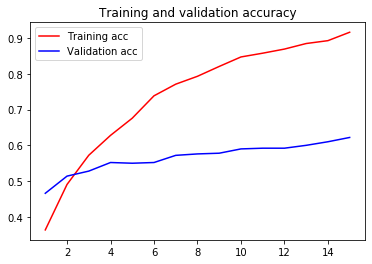

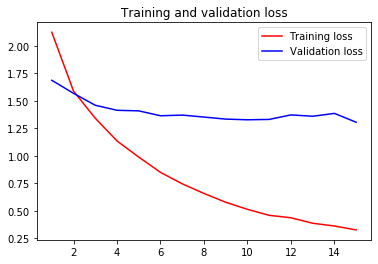

In [12]:
acc = textcnn_history.history['accuracy']
val_acc = textcnn_history.history['val_accuracy']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()


In [13]:
# Bidrectional LSTM with convolution
# from https://www.kaggle.com/eashish/bidirectional-gru-with-convolution

inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
outp = Dense(len(int_category), activation="softmax")(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

BiGRU.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 200)     3690800     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 500, 200)     0           embedding_1[1][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 500, 256)     252672      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [14]:
# training

bigru_history = BiGRU.fit(x_train, 
                          y_train, 
                          batch_size=128, 
                          epochs=15, 
                          validation_data=(x_val, y_val))


Train on 1999 samples, validate on 500 samples
Epoch 1/15
1999/1999 [==============================] - 649s 325ms/step - loss: 1.8856 - acc: 0.4202 - val_loss: 1.5291 - val_acc: 0.5100
Epoch 2/15
1999/1999 [==============================] - 659s 330ms/step - loss: 1.5162 - acc: 0.5173 - val_loss: 1.3679 - val_acc: 0.5600
Epoch 3/15
1999/1999 [==============================] - 679s 340ms/step - loss: 1.3582 - acc: 0.5543 - val_loss: 1.2790 - val_acc: 0.5920
Epoch 4/15
1999/1999 [==============================] - 711s 356ms/step - loss: 1.2404 - acc: 0.5948 - val_loss: 1.2136 - val_acc: 0.6140
Epoch 5/15
1999/1999 [==============================] - 733s 367ms/step - loss: 1.1584 - acc: 0.6223 - val_loss: 1.1475 - val_acc: 0.6080
Epoch 6/15
1999/1999 [==============================] - 767s 384ms/step - loss: 1.0837 - acc: 0.6438 - val_loss: 1.1339 - val_acc: 0.6140
Epoch 7/15
1999/1999 [==============================] - 787s 393ms/step - loss: 1.0250 - acc: 0.6558 - val_loss: 1.0941 - val

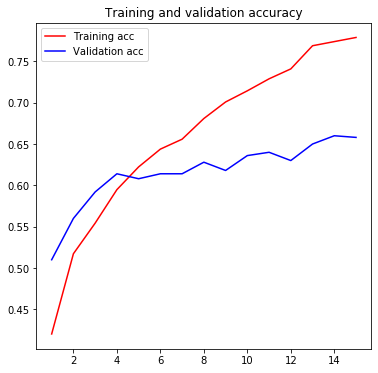

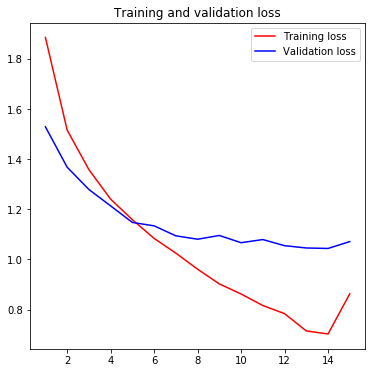

In [15]:
plt.rcParams['figure.figsize'] = (6,6)

acc = bigru_history.history['acc']
val_acc = bigru_history.history['val_acc']
loss = bigru_history.history['loss']
val_loss = bigru_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()


In [16]:
# from https://www.kaggle.com/qqgeogor/keras-lstm-attention-glove840b-lb-0-043/code

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    

lstm_layer = LSTM(300, dropout=0.25, recurrent_dropout=0.25, return_sequences=True)

inp = Input(shape=(maxlen,), dtype='int32')
embedding= embedding_layer(inp)
x = lstm_layer(embedding)
x = Dropout(0.25)(x)
merged = Attention(maxlen)(x)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.25)(merged)
merged = BatchNormalization()(merged)
outp = Dense(len(int_category), activation='softmax')(merged)

AttentionLSTM = Model(inputs=inp, outputs=outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

AttentionLSTM.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 200)          3690800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 300)          601200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 300)          0         
_________________________________________________________________
attention_1 (Attention)      (None, 300)               800       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0   

In [ ]:
attlstm_history = AttentionLSTM.fit(x_train, 
                                    y_train, 
                                    batch_size=128, 
                                    epochs=15, 
                                    validation_data=(x_val, y_val))


Train on 1999 samples, validate on 500 samples
Epoch 1/15
1999/1999 [==============================] - 365s 183ms/step - loss: 2.1088 - acc: 0.4167 - val_loss: 2.3160 - val_acc: 0.5400
Epoch 2/15
1999/1999 [==============================] - 349s 175ms/step - loss: 1.7034 - acc: 0.5293 - val_loss: 2.1929 - val_acc: 0.5080
Epoch 3/15
1999/1999 [==============================] - 363s 181ms/step - loss: 1.4829 - acc: 0.5498 - val_loss: 2.0653 - val_acc: 0.5040
Epoch 4/15
1999/1999 [==============================] - 372s 186ms/step - loss: 1.3736 - acc: 0.5758 - val_loss: 1.9612 - val_acc: 0.5100
Epoch 5/15
1999/1999 [==============================] - 376s 188ms/step - loss: 1.2880 - acc: 0.5978 - val_loss: 1.8702 - val_acc: 0.5100
Epoch 6/15
1999/1999 [==============================] - 386s 193ms/step - loss: 1.1837 - acc: 0.6278 - val_loss: 1.7496 - val_acc: 0.5140
Epoch 7/15
1999/1999 [==============================] - 391s 196ms/step - loss: 1.1806 - acc: 0.6198 - val_loss: 1.7435 - val

In [ ]:
# confusion matrix

predicted = AttentionLSTM.predict(x_val)
cm = pd.DataFrame(confusion_matrix(y_val.argmax(axis=1), predicted.argmax(axis=1)))


In [ ]:
from IPython.display import display
pd.options.display.max_columns = None
display(cm)


In [ ]:
def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)


In [ ]:
print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))
print("model LSTM with Attention:       %.6f" % evaluate_accuracy(AttentionLSTM))


In [ ]:
def evaluate_accuracy_ensemble(models):
    res = np.zeros(shape=y_val.shape)
    for model in models:
        predicted = model.predict(x_val)
        res += predicted
    res /= len(models)
    diff = y_val.argmax(axis=-1) - res.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)


In [ ]:
print(evaluate_accuracy_ensemble([TextCNN, BiGRU, AttentionLSTM]))
